# Machine learning Project: Hyderabad House price prediction


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


**ReadingData from Excel file**

In [4]:
df1 = pd.read_excel("house.xlsx")
df1.head(20)

,location,price,total_sqft,bhk,bathroom,index
0,Kollur,2799000,1000,2,2,1
1,Gandimaisamma,2619000,970,2,2,2
2,Manikonda,6661000,1448,3,3,3
3,Krishna Reddy Pet,3483000,1161,2,2,4
4,Nizampet,7931000,1555,3,3,5
5,Nizampet,6120000,1200,2,2,6
6,Hi-Tech City,19200000,3000,4,4,7
7,Bachupally,14600000,1873,3,3,8
8,Mokila,8809000,1421,2,2,9
9,Mokila,8809000,1421,3,3,10


In [5]:
df1.shape #used to print no.of rows and columns in the table


(7193, 6)

In [7]:
df1['location'].unique() #finding out unique location names 

array(['Kollur', 'Gandimaisamma', 'Manikonda', 'Krishna Reddy Pet',
       'Nizampet', 'Hi-Tech City', 'Bachupally', 'Mokila', 'Gachibowli',
       'Indra Reddy Allwyn Colony', 'Boduppal', 'Miyapur', 'Kondapur',
       'Nanakramguda', 'Puppalaguda', 'Bandlaguda', 'Kukatpally',
       'Hafeezpet', 'Mallampet', 'Madinaguda', 'Suraram', 'Adibatla',
       'Gopanpally', 'Narsingi', 'Nagole', 'Gajulramaram', 'Attapur',
       'Kismathpur', 'Aminpur', 'Tukkuguda', 'Begumpet', 'Appa Junction',
       'Vishali Nagar', 'Financial District', 'Chikkadapally', 'Shaikpet',
       'Munganoor', 'Gandipet', 'Pragati Nagar', 'Venkatraya Nagar',
       'Tellapur', 'Patancheru', 'Kompally', 'Nallagandla', 'Khajaguda',
       'Peerzadiguda', 'Narapally', 'Eadulabad, Ghatkesar', 'Lingampally',
       'Banjara hills', 'Nallakunta', 'Vidya nagar', 'Pocharam',
       'Kundanpally', 'Cooperative Bank Colony', 'Hayathnagar', 'Kokapet',
       'Budvel', 'Nagaram', 'gundlapochampally', 'BHEL', 'Rajendra Nagar',
 

In [8]:
df1['location'].value_counts()

Beeramguda                    256
Gachibowli                    240
Kondapur                      232
Bachupally                    231
Manikonda                     178
                             ... 
Sahebnagar vanasthalipuram      1
Padmarao Nagar                  1
Bandari layout                  1
AMMENPUR                        1
bandari layout, nizampet        1
Name: location, Length: 554, dtype: int64

In [9]:
df2=df1.drop(['index'],axis='columns') #drop unnecessary coloums
df2.shape

(7193, 5)

# Data Cleaning: Handle NA values


In [10]:
df2.isnull().sum() #to check for any empty or null values in the data

location      0
price         0
total_sqft    0
bhk           0
bathroom      0
dtype: int64

In [11]:
df2.bhk.unique()

array([ 2,  3,  4,  5,  1,  6,  8,  7, 16, 12, 10, 14, 15,  9, 11, 20, 22,
       27, 13, 24], dtype=int64)

In [12]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']/df3['total_sqft'] #creating a new column for "price per sq.ft"
df3.head()

,location,price,total_sqft,bhk,bathroom,price_per_sqft
0,Kollur,2799000,1000,2,2,2799.000000
1,Gandimaisamma,2619000,970,2,2,2700.000000
2,Manikonda,6661000,1448,3,3,4600.138122
3,Krishna Reddy Pet,3483000,1161,2,2,3000.000000
4,Nizampet,7931000,1555,3,3,5100.321543


In [13]:
len(df3.location.unique())

554

In [14]:
df3.location = df3.location.apply(lambda x: x.strip()) #to remove any white spaces in location coulumn
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Beeramguda                    256
Gachibowli                    240
Kondapur                      232
Bachupally                    231
Manikonda                     178
                             ... 
Sahebnagar vanasthalipuram      1
Padmarao Nagar                  1
Bandari layout                  1
AMMENPUR                        1
bandari layout, nizampet        1
Name: location, Length: 554, dtype: int64

# Dimensionality Reduction

**Any location having less than 4 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [15]:
len(location_stats[location_stats]>4) #finding no.of location which occur less than 4 times in data


554

In [16]:
location_stats_less_than_4 = location_stats[location_stats<=4]
location_stats_less_than_4

Diamond Hills                 4
kolluru                       4
Jahanuma                      4
RN Reddy Colony               4
Old Malakpet                  4
                             ..
Sahebnagar vanasthalipuram    1
Padmarao Nagar                1
Bandari layout                1
AMMENPUR                      1
bandari layout, nizampet      1
Name: location, Length: 289, dtype: int64

In [17]:
len(df3.location.unique())

554

In [18]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_4 else x) #if a location occurs less than 4 times its marked as others for easy usability 
len(df3.location.unique())

266

In [19]:
df3.head(20)

,location,price,total_sqft,bhk,bathroom,price_per_sqft
0,Kollur,2799000,1000,2,2,2799.000000
1,Gandimaisamma,2619000,970,2,2,2700.000000
2,Manikonda,6661000,1448,3,3,4600.138122
3,Krishna Reddy Pet,3483000,1161,2,2,3000.000000
4,Nizampet,7931000,1555,3,3,5100.321543
5,Nizampet,6120000,1200,2,2,5100.000000
6,Hi-Tech City,19200000,3000,4,4,6400.000000
7,Bachupally,14600000,1873,3,3,7794.981313
8,Mokila,8809000,1421,2,2,6199.155524
9,Mokila,8809000,1421,3,3,6199.155524


# Outlier Removal Using Business Logic

**normally square ft per bedroom is 300 i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [20]:
df3[df3.total_sqft/df3.bhk<200] 

,location,price,total_sqft,bhk,bathroom,price_per_sqft
154,Gajulramaram,12500000,110,6,6,113636.363636
390,Beeramguda,20000000,1539,8,8,12995.451592
968,Appa Junction,48000000,1800,15,15,26666.666667
988,New Nallakunta,13000000,990,5,4,13131.313131
990,Bagh Amberpet,13000000,900,5,5,14444.444444
...,...,...,...,...,...,...
7137,Santoshnagar,9900000,900,6,4,11000.000000
7144,Tilak Nagar,17000000,945,10,8,17989.417989
7156,Tolichowki,19500000,1440,13,11,13541.666667
7157,Tolichowki,9000000,558,4,3,16129.032258


In [21]:
df4 = df3[~(df3.total_sqft/df3.bhk<200)]
df4.shape

(6983, 6)

In [22]:
df3.shape

(7193, 6)

# Outlier Removal Using Standard Deviation and Mean


In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(5586, 6)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

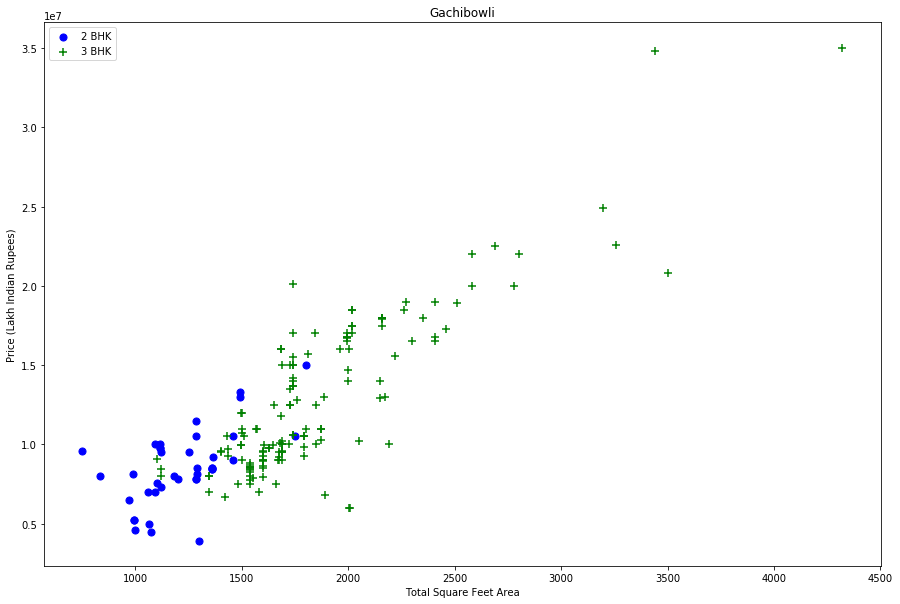

In [26]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Gachibowli")

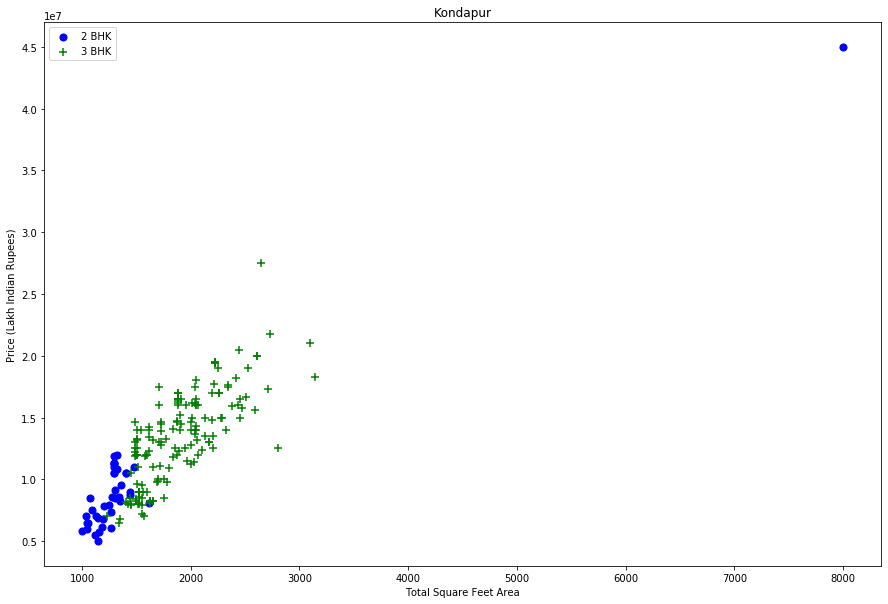

In [27]:
plot_scatter_chart(df5,"Kondapur")

Text(0, 0.5, 'Count')

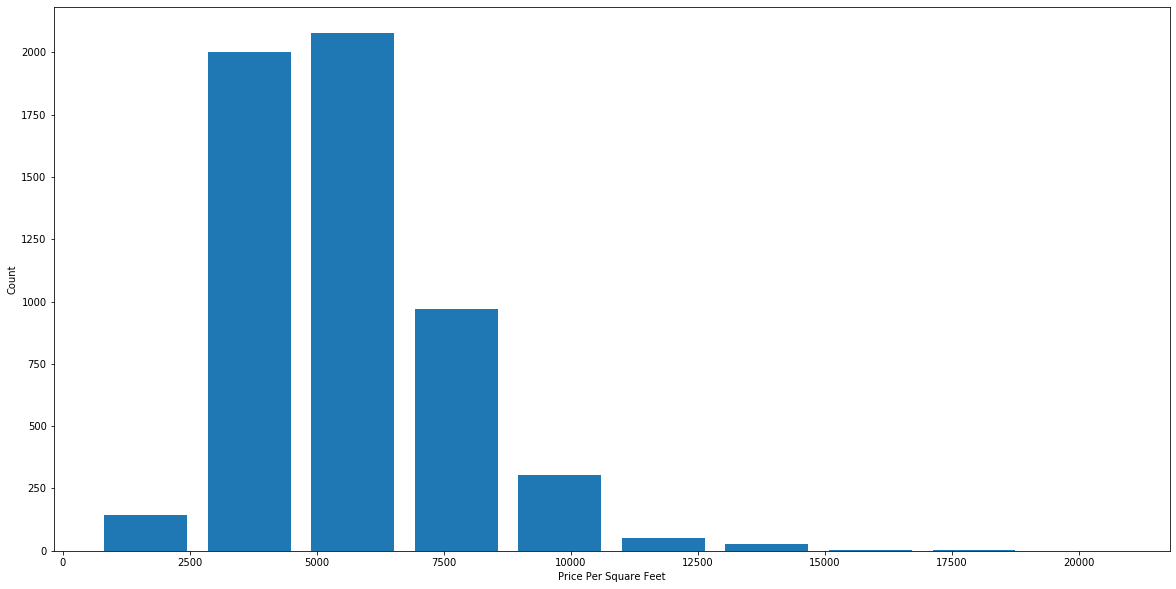

In [28]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [29]:
df5.bathroom.unique()

array([ 2,  3,  4,  1,  7,  6,  5, 10, 15,  8, 14,  9, 21, 18, 12, 11],
      dtype=int64)

In [30]:
df5[df5.bathroom>10]

,location,price,total_sqft,bhk,bathroom,price_per_sqft
331,Bachupally,40000000,10500,14,15,3809.523810
630,Bandlaguda,24000000,8200,14,14,2926.829268
1080,Chandanagar,32500000,9300,20,21,3494.623656
1985,Hyder Nagar,37000000,9000,16,18,4111.111111
2739,LB Nagar,35000000,3195,11,12,10954.616588
2763,LB Nagar,20000000,5500,12,12,3636.363636
4982,YousufGuda,52000000,11000,20,18,4727.272727
5392,other,40000000,8000,20,15,5000.000000
5510,other,23500000,2547,11,11,9226.541029


In [31]:
df6 = df5.drop(['price_per_sqft'],axis='columns')
df6.head(3)

,location,price,total_sqft,bhk,bathroom
0,Abids,11000000,1600,3,2
1,Abids,9750000,1500,3,2
2,Abids,7800000,1200,2,2


# Use One Hot Encoding For Location

In [32]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,Abids,Adibatla,Alkapuri,Allwyn Colony,Almas guda,Ambedkar Nagar,Amberpet,Ameerpet,Aminpur,Anand Bagh,...,Vittal Rao Nagar,Whitefield,Yellareddyguda,YousufGuda,barkatpura,chandrayangutta,kompalli,kompally near by dulapalli,kuntloor,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,price,total_sqft,bhk,bathroom,Abids,Adibatla,Alkapuri,Allwyn Colony,Almas guda,...,Vijaya Nagar Colony,Vittal Rao Nagar,Whitefield,Yellareddyguda,YousufGuda,barkatpura,chandrayangutta,kompalli,kompally near by dulapalli,kuntloor
0,Abids,11000000,1600,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abids,9750000,1500,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abids,7800000,1200,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abids,7000000,1100,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adibatla,5356000,1338,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df8 = df7.drop('location',axis='columns')
df8.head(2)

,price,total_sqft,bhk,bathroom,Abids,Adibatla,Alkapuri,Allwyn Colony,Almas guda,Ambedkar Nagar,...,Vijaya Nagar Colony,Vittal Rao Nagar,Whitefield,Yellareddyguda,YousufGuda,barkatpura,chandrayangutta,kompalli,kompally near by dulapalli,kuntloor
0,11000000,1600,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9750000,1500,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df8.shape


(5586, 269)

In [37]:
X = df8.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bhk,bathroom,Abids,Adibatla,Alkapuri,Allwyn Colony,Almas guda,Ambedkar Nagar,Amberpet,...,Vijaya Nagar Colony,Vittal Rao Nagar,Whitefield,Yellareddyguda,YousufGuda,barkatpura,chandrayangutta,kompalli,kompally near by dulapalli,kuntloor
0,1600,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(5586, 268)

In [39]:

y = df8.price
y.head(3)

0    11000000
1     9750000
2     7800000
Name: price, dtype: int64

In [40]:
len(y)

5586

# Building a Model

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7992207541150769

# Find best model using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.787279,{'normalize': False}
1,lasso,0.787286,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.722395,"{'criterion': 'mse', 'splitter': 'random'}"


# Test the model


In [44]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [45]:
predict_price('Gachibowli',1000, 2, 2)

7681361.69324537

In [46]:
predict_price('Gachibowli',2000, 3, 3)

15580787.459294157

In [47]:
predict_price('Gachibowli',1000, 3, 2)

6323919.296898108

In [48]:
predict_price('Gachibowli',1000, 2, 2)

7681361.69324537

In [49]:
predict_price('Gachibowli',1000, 2, 3)

8408351.977199117

In [50]:
predict_price('Gachibowli',5000, 2, 2)

41800873.20701459

In [51]:
import pickle
with open('Hyderabad_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [52]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))